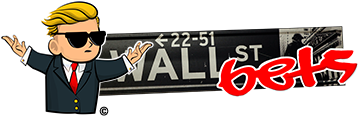

# Feature importance


### Preprocess atributes

In [ ]:
df.dtypes.value_counts()

float64    113
object      29
int64       21
dtype: int64

In [ ]:
df = pd.read_csv('with_most_dominant_colors.csv', na_filter=False)
df.select_dtypes(include=['object']).head(3)

id  ... color_5_v
0  l6ulcx  ...          
1  l6uibd  ...          
2  l6uhhn  ...          

[3 rows x 29 columns]

In [ ]:
df = pd.read_csv('with_most_dominant_colors.csv', na_filter=False)

print(f'# of columns before drop {len(df.columns)}')

df = df.drop(['timestamp_unix', 'url', 'id', 'processed_title', 'processed_body', 'processed_emoji', 'domain', 'file_path', 'processed_image_text', 'processed_image_objects', ],axis=1)

print(f'# of columns after drop {len(df.columns)}')

df.to_csv('with_removed_atributes.csv', index=False) 

df.head(2)

# of columns before drop 163
# of columns after drop 153


score  comms_num  year  month  ...  color_4_v  color_5_h  color_5_s color_5_v
0     55          6  2021      1  ...                                           
1    110         23  2021      1  ...                                           

[2 rows x 153 columns]

In [ ]:
df = pd.read_csv('with_removed_atributes.csv', na_filter=False)

cols = [x for x in df.columns if x.startswith("color")]

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

df = df.fillna(0)

print(f'# of columns before one hot encoding {len(df.columns)}')

df = pd.get_dummies(df)

print(f'# of columns after one hot encoding {len(df.columns)}')

df.to_csv('with_transformed_text_atributes.csv', index=False) 

df.head(2)

# of columns before one hot encoding 153
# of columns after one hot encoding 167


score  comms_num  year  month  ...  type_image  type_other  type_self  type_video
0     55          6  2021      1  ...           0           0          0           1
1    110         23  2021      1  ...           0           0          0           1

[2 rows x 167 columns]

In [ ]:
df.dtypes.value_counts()

float64    128
int64       21
uint8       18
dtype: int64

### Standarization

In [ ]:
df = pd.read_csv('with_transformed_text_atributes.csv', na_filter=False)

cols = [col for col in df.columns if col not in ['score']]

X = df[cols]

# scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler = RobustScaler()
X = scaler.fit_transform(X)

df[cols] = X

df.to_csv('with_standarized_atributes.csv', index=False) 

df.describe()

score     comms_num  ...     type_self    type_video
count   32522.000000  32522.000000  ...  32522.000000  32522.000000
mean      999.044001      4.134286  ...     -0.359080      0.018787
std      7699.977151     65.173001  ...      0.479738      0.135775
min         0.000000     -0.222222  ...     -1.000000      0.000000
25%         1.000000     -0.185185  ...     -1.000000      0.000000
50%         9.000000      0.000000  ...      0.000000      0.000000
75%       106.000000      0.814815  ...      0.000000      0.000000
max    348241.000000   3297.925926  ...      0.000000      1.000000

[8 rows x 167 columns]

## Features importance

In [ ]:
df = pd.read_csv('with_standarized_atributes.csv', na_filter=False)

X = df.drop(['score'],axis=1)
y = df['score']

model = RandomForestRegressor(random_state=0)

model.fit(X, y)

rfr_importance = pd.Series(model.feature_importances_, index=X.columns)
rfr_importance.nlargest(10)

comms_num               0.637905
body_chars_per_word     0.054228
type_self               0.038730
title_time              0.025572
gamestop_price          0.019292
title_chars_number      0.016850
upvote_ratio            0.012181
minute                  0.011504
day                     0.010411
title_chars_per_word    0.009399
dtype: float64

In [ ]:
df = pd.read_csv('with_standarized_atributes.csv', na_filter=False)

X = df.drop(['score'],axis=1)
y = df['score']

sel = VarianceThreshold()
sel.fit(X)

vt_importance = pd.Series(sel.variances_, index=X.columns)
vt_importance.nlargest(10)

color_1_s                   5413.875038
comms_num                   4899.800000
color_2_s                    853.005462
color_1_v                    525.257014
color_3_h                    359.983185
color_5_s                    195.179133
color_4_s                    190.176113
body_chars_per_word          115.758041
color_5_h                    113.230336
image_text_digits_number      74.804961
dtype: float64

In [ ]:
df = pd.read_csv('with_standarized_atributes.csv', na_filter=False)

X = df.drop(['score'],axis=1)
y = df['score']

model = LinearRegression()
model.fit(X, y)

lr_importance = pd.Series(model.coef_, index=X.columns).abs()
lr_importance.nlargest(10)

year                        1.457200e+11
body_emoji_number           6.144882e+08
title_sentiment_Positive    3.346288e+08
title_sentiment_Negative    3.346286e+08
title_sentiment_Neutral     3.346286e+08
body_sentiment_Positive     2.944291e+08
body_sentiment_Negative     2.944290e+08
body_sentiment_Neutral      2.944289e+08
type_video                  1.646805e+08
type_image                  1.646771e+08
dtype: float64

In [ ]:
# df = pd.read_csv('with_standarized_atributes.csv', na_filter=False)

# X = df.drop(['score'],axis=1)
# y = df['score']

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# model = KNeighborsRegressor()
# model.fit(X_train, y_train)

# results = permutation_importance(model, X_test, y_test, scoring='neg_mean_squared_error', n_jobs=-1, n_repeats=2)

# pi_importance = pd.Series(results.importances_mean, index=X.columns)
# pi_importance.nlargest(10)

In [ ]:
percentile = 0.80

rfr_importance_eighty_percentile = rfr_importance[rfr_importance > rfr_importance.quantile(percentile)].sort_values()
vt_importance_eighty_percentile = vt_importance[vt_importance > vt_importance.quantile(percentile)].sort_values()
lr_importance_eighty_percentile = lr_importance[lr_importance > lr_importance.quantile(percentile)].sort_values()

print(f"RandomForestRegressor 80th percentile length: {len(rfr_importance_eighty_percentile)}")
print(f"VarianceThreshold 80th percentile length: {len(vt_importance_eighty_percentile)}")
print(f"LinearRegression 80th percentile length: {len(lr_importance_eighty_percentile)}")

RandomForestRegressor 80th percentile length: 34
VarianceThreshold 80th percentile length: 34
LinearRegression 80th percentile length: 34


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0.0, flags=flags)


True

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128640 missing from current font.
  font.set_text(s, 0, flags=flags)


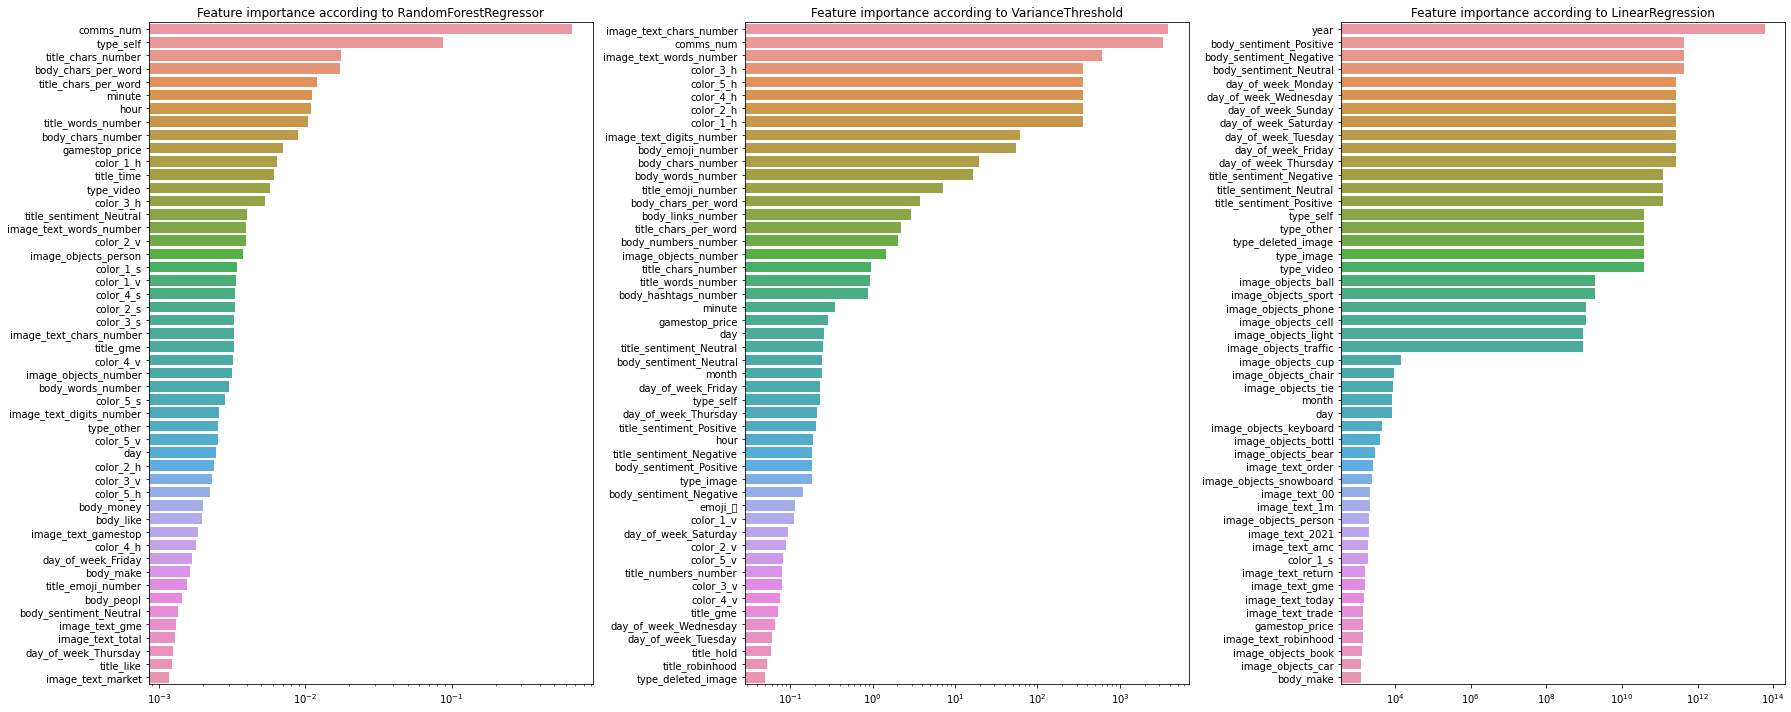

In [ ]:
n_largest = 50
fig, axis = plt.subplots(1, 3,figsize=[25,10])

head = rfr_importance.nlargest(n_largest)
ax = sns.barplot(x=head.values, y=head.index, ax = axis[0])
ax.set_title("Feature importance according to RandomForestRegressor")
ax.set_xscale("log")

head = vt_importance.nlargest(n_largest)
ax = sns.barplot(x=head.values, y=head.index, ax = axis[1])
ax.set_title("Feature importance according to VarianceThreshold")
ax.set_xscale("log")

head = lr_importance.nlargest(n_largest)
ax = sns.barplot(x=head.values, y=head.index, ax = axis[2])
ax.set_title("Feature importance according to LinearRegression")
ax.set_xscale("log")

fig.tight_layout()

True

In [ ]:
rfr_important_cols = rfr_importance_eighty_percentile.index.to_list()
vt_important_cols = vt_importance_eighty_percentile.index.to_list()
lr_important_cols = lr_importance_eighty_percentile.index.to_list()

important_cols = list(set(rfr_important_cols + vt_important_cols + lr_important_cols))
print(f'Number of attributes: {len(important_cols)}\n')
print("\n".join(important_cols))

Number of attributes: 72

title_time
image_objects_remot
day_of_week_Tuesday
color_2_v
body_chars_per_word
body_links_number
color_2_h
day_of_week_Thursday
image_objects_ball
day_of_week_Sunday
type_image
upvote_ratio
image_objects_car
image_objects_phone
minute
day_of_week_Wednesday
color_4_s
type_other
title_chars_per_word
day_of_week_Monday
title_gme
color_1_v
comms_num
day_of_week_Saturday
day
color_3_h
title_words_number
image_objects_traffic
color_3_v
body_numbers_number
body_sentiment_Neutral
image_text_digits_number
color_5_v
month
image_text_words_number
image_text_total
hour
image_objects_cup
color_4_v
body_sentiment_Negative
color_1_h
type_video
body_chars_number
image_objects_person
type_self
day_of_week_Friday
color_2_s
image_objects_number
color_3_s
color_5_h
body_emoji_number
body_hashtags_number
image_objects_tie
color_5_s
body_sentiment_Positive
type_deleted_image
image_objects_chair
title_emoji_number
year
image_objects_light
image_objects_cell
color_1_s
title_sentime

## Correlation between (single) attributes 







In [ ]:
df_view = pd.read_csv('with_most_dominant_colors.csv', na_filter=False)

### All attributes

In [ ]:
# Correlation

corr = df_view.corr(method='spearman')

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(600, 600))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### What correlates the most with score?

In [ ]:
# same correlation
corr_score = corr['score']
corr_score.sort_values(ascending=False, kind="quicksort").head(30)

score                       1.000000
comms_num                   0.706940
month                       0.426188
image_text_words_number     0.260523
image_text_chars_number     0.260218
image_text_digits_number    0.244757
emoji_💎                     0.210143
image_text_gme              0.175191
image_text_valu             0.161237
title_emoji_number          0.155686
image_text_cost             0.155421
image_objects_number        0.154368
image_text_total            0.153320
title_chars_number          0.145174
title_words_number          0.143845
image_text_share            0.140115
image_text_gamestop         0.138250
image_text_price            0.132408
emoji_🙌                     0.131302
image_text_00               0.130392
image_text_market           0.127241
body_posit                  0.117811
image_text_amc              0.111310
image_text_buy              0.109754
body_day                    0.109191
body_numbers_number         0.108819
body_share                  0.107846
i

In [ ]:
# opposite correlation
corr_score.sort_values(ascending=True, kind="quicksort").head(15)

day                   -0.309774
body_chars_per_word   -0.152441
title_buy             -0.090152
title_robinhood       -0.081493
body_words_number     -0.075707
body_chars_number     -0.071393
gamestop_price        -0.066811
body_robinhood        -0.058199
title_trade           -0.051008
title_nok             -0.040744
title_let             -0.031970
title_bb              -0.028857
body_buy              -0.023790
title_amc             -0.014580
title_dip             -0.013836
Name: score, dtype: float64

### What correlates with gamestop price? Is it useless?

In [ ]:
corr_score['gamestop_price']

-0.06681068005102703

In [ ]:
corr_gp = corr['gamestop_price']
corr_gp.sort_values(ascending=False, kind="quicksort").head(15)

gamestop_price          1.000000
day                     0.625375
title_robinhood         0.115965
body_robinhood          0.094660
title_chars_per_word    0.050958
title_buy               0.050888
title_trade             0.049522
title_market            0.047682
body_trade              0.038652
body_fund               0.038354
title_chars_number      0.036347
emoji_🚀                 0.036286
title_nok               0.036178
title_fuck              0.034069
body_buy                0.033804
Name: gamestop_price, dtype: float64

In [ ]:
corr_gp.sort_values(ascending=True, kind="quicksort").head(15)

month                      -0.696816
hour                       -0.114837
comms_num                  -0.080910
title_loss                 -0.079239
emoji_💎                    -0.076084
score                      -0.066811
image_text_digits_number   -0.066307
image_text_words_number    -0.059271
image_text_invest          -0.059164
image_text_chars_number    -0.058167
emoji_🙌                    -0.057699
image_text_valu            -0.057124
image_text_gme             -0.056543
image_text_amc             -0.056057
image_text_total           -0.054620
Name: gamestop_price, dtype: float64

### Simple "sentiment analysis" when it comes to the Robinhood company

In [ ]:
corr['title_robinhood'].sort_values(ascending=False, kind="quicksort").head(15)

title_robinhood         1.000000
body_robinhood          0.281575
title_chars_per_word    0.227827
day                     0.132758
gamestop_price          0.115965
title_chars_number      0.112536
image_text_robinhood    0.084289
title_fuck              0.065240
title_words_number      0.063844
title_trade             0.060101
body_chars_per_word     0.051338
title_market            0.045361
body_trade              0.044750
title_stock             0.027991
body_fuck               0.023926
Name: title_robinhood, dtype: float64

In [ ]:
corr['title_robinhood'].sort_values(ascending=True, kind="quicksort").head(15)

month                      -0.175993
comms_num                  -0.116692
title_emoji_number         -0.088257
score                      -0.081493
title_hold                 -0.080908
emoji_💎                    -0.077497
emoji_🚀                    -0.069682
image_text_digits_number   -0.061994
image_text_words_number    -0.060432
image_text_chars_number    -0.059555
image_text_valu            -0.054722
image_text_00              -0.054491
body_hold                  -0.052802
image_text_total           -0.051247
emoji_🙌                    -0.051009
Name: title_robinhood, dtype: float64

### Emoji as WallstreetBets symbol

In [ ]:
# "diamond hands"
corr['emoji_💎'].sort_values(ascending=False, kind="quicksort").head(15)

emoji_💎               1.000000
emoji_🙌               0.595060
title_emoji_number    0.518691
body_emoji_number     0.357247
emoji_👐               0.311532
emoji_🚀               0.263130
emoji_🏻               0.224496
score                 0.210143
month                 0.200627
emoji_🏼               0.200516
emoji_🖐               0.175747
comms_num             0.148951
title_hold            0.137179
emoji_🏽               0.121427
image_text_valu       0.119435
Name: emoji_💎, dtype: float64

### Correlation of transformed attributes (nowe na końcu)

In [ ]:
df_view = pd.read_csv('with_transformed_text_atributes.csv', na_filter=False)

In [ ]:
corr = df_view.corr(method='spearman')

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(400, 400))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})